In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance_dataset.csv')
df.head()

,age,affordability,have_insurance
0,56,1,1
1,69,1,1
2,46,0,0
3,32,1,1
4,60,0,0


<Axes: xlabel='age', ylabel='affordability'>

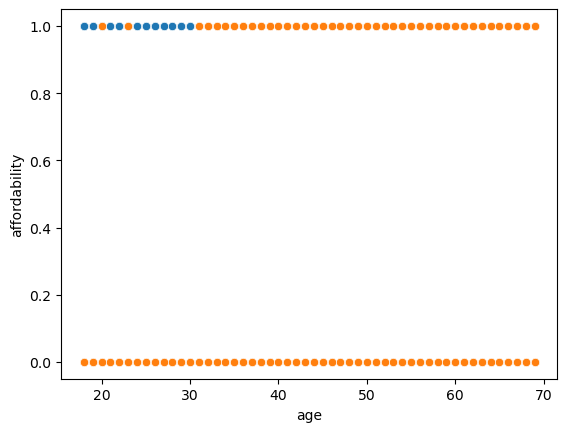

In [3]:
sns.scatterplot(data=df,x='age',y='affordability')
sns.scatterplot(data=df,x='age',y='have_insurance')

In [4]:
df.age.min()
df.age.max()

69

In [5]:
x = df.iloc[:,0:2]
y = df.have_insurance

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
print('train size\t',x_train.shape[0])
print('test size\t',x_test.shape[0])

train size	 789
test size	 198


In [7]:
# scaling age 
x_train_scaled = x_train
x_train_scaled['age'] = x_train_scaled.age/100

x_test_scaled = x_test
x_test_scaled.age = x_test_scaled.age/100

In [10]:
model = keras.Sequential([keras.layers.Dense(1,input_shape=(2,),activation='sigmoid',
                                             kernel_initializer='ones', bias_initializer='zeros') # weight 1,bias 0
                         ])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(x_train_scaled,y_train,epochs=500)

Epoch 1/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8919 - loss: 0.3649
Epoch 2/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8893 - loss: 0.3730
Epoch 3/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8723 - loss: 0.3869
Epoch 4/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8585 - loss: 0.3938
Epoch 5/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8896 - loss: 0.3617
Epoch 6/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8794 - loss: 0.3801
Epoch 7/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8911 - loss: 0.3639
Epoch 8/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8868 - loss: 0.3683
Epoch 9/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8864 - loss: 0.3645
Epoch 10/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8888 - loss: 0.3675
Epoch 11/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8892 - loss: 0.3642
Epoch 12/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [14]:
x_test_scaled.head()

,age,affordability
309,0.41,0
139,0.52,0
499,0.18,0
854,0.51,1
88,0.38,0


In [16]:
np.round(model.predict(x_test_scaled.head()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[0.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [54]:
model.predict(x_test_scaled.head())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[0.03091542],
       [0.05201938],
       [0.01015922],
       [0.83925366],
       [0.02677834]], dtype=float32)

In [18]:
y_pred = np.round(model.predict(x_test_scaled))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8737373737373737

In [24]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
confusion_matrix(y_test,y_pred)

array([[101,  22],
       [  3,  72]], dtype=int64)

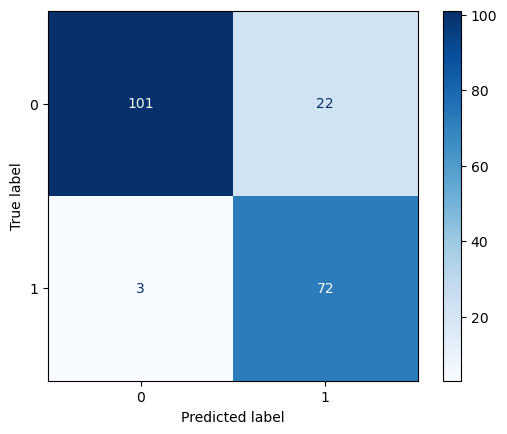

In [27]:
cm = confusion_matrix(y_test, y_pred)

# Display with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0", "1"])
disp.plot(cmap='Blues')
plt.show()

In [28]:
coef, intercept = model.get_weights()
coef, intercept

(array([[4.9307213],
        [4.60471  ]], dtype=float32),
 array([-5.4666924], dtype=float32))

In [49]:
def prediction_funct(age,aff):
    def sigmoid(x):
        import math
        return 1/(1+math.exp(-x))
    import numpy 
    age = age/100
    y = coef[0]*age+coef[1]*aff+intercept
    return np.round(sigmoid(y))

In [51]:
prediction_funct(34,1)
# prediction_funct(21,0)

1.0

In [52]:
def prediction_funct_no_round(age,aff):
    def sigmoid(x):
        import math
        return 1/(1+math.exp(-x))
    import numpy 
    age = age/100
    y = coef[0]*age+coef[1]*aff+intercept
    return sigmoid(y)

In [53]:
prediction_funct_no_round(41,0)

0.030915422223039248